

##**Background**
Selection of housing is always difficult for someone seeking for a suitable one as it includes various factors and preferences. People prefer to buy a house considering many criteria like- population, quality of life, financial capability, as well as social and natural environments around the housing block. In this assignment you will be helping people choosing suitable housing for them according to their needs.
##**Dataset**
**Dataset file name:** housing_dataset.csv

**Dataset description:** Dataset contains total 10 features (columns). It contains the location, housing age, population, number of families in a housing (block), number of rooms, average income of the families in that housing, ocean proximity and other informaiton. Each row indicates a record of a housing block containing the features mentioned earlier.

**Features:** 

1.   latitude (float): Latitude of the location of a housing in conventional geospace
2.   longitude (float): Longitude of the location of a housing in conventional geospace
3.   housing_age (int): Age of the housing in year, the higher number indicates the older housing
4.    total_rooms (int): Total number of rooms in a housing
5.    total_bedrooms (int): Total number of bedrooms in a housing
6.    population (int): Total population of a housing
7.    families (int): Total number of families living in a housing
8.    average_income (float): Average income of the member of a housing in a scale of Tousand Dollar Per Month
9.    ocean_proximity (string): Describing how close the housing is to the ocean
10.   house_value (int): Average individual house price of a housing in Dollers


## Average age of house blocks near the ocean

In [8]:
# INSERT your code here.
import pandas as pd
import statistics as st


data = pd.read_csv("housing_dataset.csv")
Near_ocean = data[data["ocean_proximity"] == 'NEAR OCEAN']
print("Avergae age of house blocks near the ocean is {}".format(round(Near_ocean['housing_age'].mean(),2)))



Avergae age of house blocks near the ocean is 29.35


## Housing block with the most and least population density (per family).

In [9]:
# INSERT your code here.

NewCol = data["population"]/data["families"]
data['Population Density'] = NewCol 

min_density = data['Population Density'].min()
max_density = data['Population Density'].max()

Min_Income = data[data["Population Density"] == min_density]["average_income"].item()
print("Income with least populaton density is",Min_Income)
Max_Income = data[data["Population Density"] == max_density]["average_income"].item()
print("Income with most population densty is",Max_Income)


Income with least populaton density is 2.5893
Income with most population densty is 10.2264


## Price difference between the latest and oldest housing block from the dataset.

In [10]:
# INSERT your code here.
latest_house_age = data["housing_age"].min()
oldest_house_age = data["housing_age"].max()

Min_hou_age = data[data['housing_age'] == latest_house_age]['house_value'].mean()
Max_hou_age = data[data['housing_age'] == oldest_house_age]['house_value'].mean()
Price_Diff = Max_hou_age - Min_hou_age

print("Price difference between the oldest and lastest house is {}$".format(round(Price_Diff,2)))


Price difference between the oldest and lastest house is 131120.87$


## Cheapest price per room from the dataset.

In [11]:
# INSERT your code here.
data['Price Per Room'] = data['house_value']/data['total_rooms']
print("Cheapest Price per room is {}".format(round(data['Price Per Room'].min(),2)))


Cheapest Price per room is 1.6


5.   Calculate the population density (per family) for the most and least wealthy housing blocks in the dataset.

### Population density (per family) for the most and least wealthy housing blocks in the dataset.

In [14]:
# INSERT your code here.
Least_Wealthy = data['average_income'].min()
Most_Wealthy = data['average_income'].max()

PD_LW = round(data[data['average_income'] == Least_Wealthy]['Population Density'].mean(),2)
PD_MW = round(data[data['average_income'] == Most_Wealthy]['Population Density'].mean(),2)

print("Population density for least and most wealthy housing blocks are {} and {} respectively.".format(PD_LW,PD_MW))#

Population density for least and most wealthy housing blocks are 3.48 and 3.31 respectively.


## Price of expensive room grouped by ocean proximity.

In [37]:
# INSERT your code here.
data.groupby("ocean_proximity")["Price Per Room"].max()

ocean_proximity
<1H OCEAN     22500.000000
INLAND        68750.000000
ISLAND          451.807229
NEAR BAY      62500.125000
NEAR OCEAN    23333.333333
Name: Price Per Room, dtype: float64

## Population scatter plot against housing age

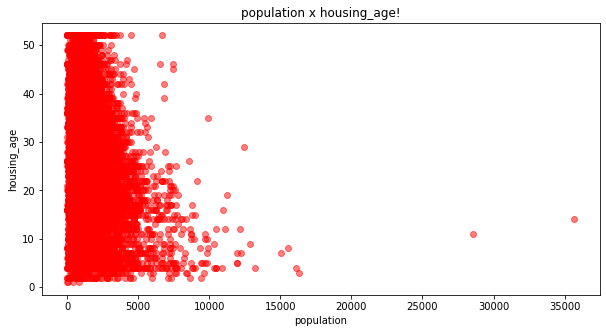

In [16]:
# INSERT your code here.
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(10,5))

ax.scatter(data['population'], data['housing_age'] ,
                   
                   alpha=0.5,
                   facecolor='red',
                   edgecolor='face'
                   )
ax.set_title('population x housing_age!')
ax.set_xlabel('population')
ax.set_ylabel('housing_age')
ax

## Bar Chart of average values of all suitable columns

Text(0.5, 1.0, 'Column Means')

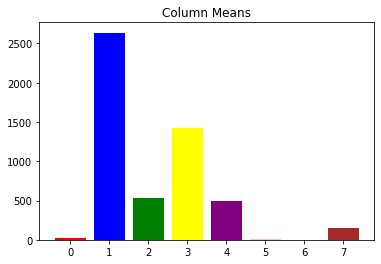

In [43]:
fig2, bx = plt.subplots()
freq = [data['housing_age'].mean(),
        data['total_rooms'].mean(),
        data['total_bedrooms'].mean(),
      data['population'].mean(),
     data['families'].mean(),
    data['average_income'].mean(),
     #  data['house_value'].mean(),
       data['Population Density'].mean(),
       data['Price Per Room'].mean()]
xps = np.arange(len(freq))
#color = ['red','blue','green','yellow','purple','pink','black','brown','orange']
bx.bar(xps,freq, align="center",color=color)
bx.set_title('Column Means')

#### Saving the details of all housing blocks in a csv file having houses near oceans and lower than the average of the housing value.

In [44]:
# INSERT your code here.
export1 = data[(data['ocean_proximity'] == 'NEAR BAY') & (data['house_value'] < data['house_value'].mean())]
export1.to_csv('export1.csv')


#### Creating a new housing dataset (a csv file) having only the location, total rooms and housing price information.

In [45]:
# INSERT your code here.
export2 = [data['longitude'],data['latitude'],data['total_rooms'],data['house_value']]

export2 = pd.DataFrame(export2).transpose()
export2.to_csv('export2.csv')